In [3]:
lines = []
with open('../data/train_test.txt') as f:
    l_strip = [s.strip() for s in f.readlines()]
    lines.append(l_strip)

In [7]:
lines_ = lines[0]

In [18]:
lines_[:5]

['step: 0 \ttraining acc: [0.5   0.625 0.5   0.625 0.5   0.625]\\',
 'step: 0 \ttest acc: [0.465 0.52  0.535 0.52  0.56  0.585 0.6   0.605 0.595 0.615 0.62 ]\\',
 'step: 30 \ttraining acc: [0.5   0.625 0.5   0.5   0.5   0.5  ]\\',
 'step: 60 \ttraining acc: [0.5   0.625 0.5   0.625 0.625 0.625]\\',
 'step: 90 \ttraining acc: [0.5   0.375 0.5   0.75  0.5   0.75 ]\\']

In [41]:
import re

tr = []
ts = []
for line in lines_:
    mode = re.findall('\t(t.+) acc', line)
    if len(mode) < 1:
        print(line)
        continue
    else:
        mode = mode[0]
    step = re.findall('step: (\d+)', line)[0]
    acc = re.findall('(\d.\d*\s*)]', line)[0]
    if mode == 'training':
        tr.append((int(step), float(acc)))
    elif mode == 'test':
        ts.append((int(step), float(acc)))
    else:
        print(line)

\pard\pardeftab720\sl340\qr\partightenfactor0
\cf2 \cb1 \
\pard\pardeftab720\sl340\partightenfactor0
\pard\pardeftab720\sl340\qr\partightenfactor0
\cf2 \cb1 \
\pard\pardeftab720\sl340\partightenfactor0


In [42]:
re.findall('\t(t.+) acc', lines_[0])

['training']

In [44]:
tr[:10]

[(0, 0.625),
 (30, 0.5),
 (60, 0.625),
 (90, 0.75),
 (120, 0.625),
 (150, 0.875),
 (180, 0.75),
 (210, 0.875),
 (240, 0.625),
 (270, 0.75)]

In [66]:
len(tr) // 4, len(ts) // 4

(84, 5)

In [73]:
tr_ = [(2500*(i//84)+j[0], j[1]) for i,j in enumerate(tr)]

In [77]:
ts_ = [(2500*(i//5)+j[0], j[1]) for i,j in enumerate(ts)]

In [102]:
tr_x = []
tr_y = []
for x,y in tr_:
    tr_x.append(x)
    tr_y.append(y)
ts_x = []
ts_y = []
for x,y in ts_:
    ts_x.append(x)
    ts_y.append(y)

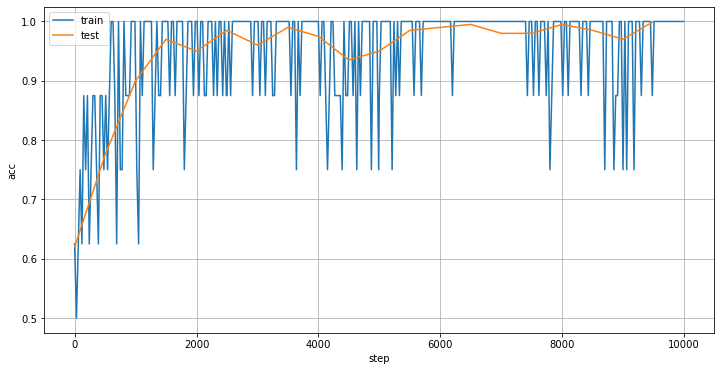

In [103]:
plt.figure(figsize=(12,6))
plt.plot(tr_x, tr_y, linestyle="solid", label = 'train')
plt.plot(ts_x, ts_y, linestyle="solid", label = 'test')
plt.xlabel("step")
plt.ylabel("acc")
plt.legend()
plt.grid(True)